In [2]:
#Linear_fit_analytical_method.ipynp
# Original File name: linearfit_errors.ipynb
# Fitting a line to data with errors
# Analytically find the best fitting parameters of a linear fit to the data through the method of ordinary least squares estimation. (i.e. find m and b for y = m*x + b)
# Based on:
# https://github.com/anazalea/phys2300stuff/tree/master/climateData
# https://github.com/anazalea/phys2300stuff/blob/master/climateData/climateChange.ipynb

# Lab 2 Hooke's Law II (Jan 14th)

Student: Liam Murray (87357539) \
Partner: Aaliyah Verhoef \
Apparatus number: Phys107 - (22 mass, 3 scale)

**Purpose:** This notebook will read a .csv file (comma-separated variables), and plot the data.
It will then use the method of least-squares to ***analytically*** find the line of best fit.
It will provide a $\chi^2$ value, a residuals plot to help diagnose the goodness-of-fit, and a plot showing the data and best fit line.

**How to use:** When you are ready to collect and analyze a new data set, make a copy of this notebook to edit (or copy and paste the relevant code cells into a new notebook). You may remove or edit the "explanation" markdown cells, and replace them with your own markdown cells for your lab report. Make sure you understand what the Python code is doing at each step.

### Familiarize: Discover
Here we get familiar with what we actually need to do. Map out how to get from what we can do with our equipment to the goal. Figure out where the uncertainties come from so we can reduce them as much as possible. In this process we will develop a brief measurement strategy to start our investigation. Some questions to ask ourselves are: 
- How does the equipment work? 
- What equations are related to the experimental goal? 
- Can we write our experimental goal in terms of variables that we can measure? 
- Which variables do we control? 
- What are our sources of uncertainty? 
- How do we assign a number of these sources of uncertainty? (quantify by asking what PDF is attributed to that uncertainty)

Often drawing a diagram of the equipment can be useful in figuring out what’s important and how it relates to the calculations we need to do in order to attain our experiment goal.

**Equations related to experiment**
$$
\begin{align}
T = 2 \pi \sqrt{\frac{M}{k}} \\
u[T] = \frac{\sigma T}{M \sqrt{N}} \\
\end{align}
$$
<center> In equation 2, M is number of oscillations, and N is number of trials. </center>


**Measurement Plan:**
1. Measure and record the mass applied to the spring as $M$ [kg].
2. Stretch the spring to an extent where the mass does not bounce while oscilating. Record this value when measured from the bottom-most edge when viewed perpendicular to the apparatus as Stretch [cm].
3. Announce release of spring by counting down from 3.
4. When spring passes by $\frac{\text{Stretch}}{2}$ [cm], begin recording using a mobile phone and have the other partner audible count each oscillation.
4. Allow spring to complete 10 oscillations, record this value as $M = 20$.
5. After 10th oscillation, stop the timer and record the time as $t$ [sec], with an uncertainty $u[t]$
    - The uncertainty in time is represented by a Gaussian Probability Distribution Function as it's related to the response times and judgement of individuals. It can be calculated as $u[t] = \frac{0.5}{4} = 0.25$ [sec]
6. Start with Repeat these steps decreasing the mass by $0.010$ [Kg]

**Uncertainty Justification**
- $u[T^2]$ is a function of one variable, in which we can calculate it using $u[T^2] = u[T] \cdot \frac{dT}{dt} = u[t] \cdot 2T$

**Preliminary observations**
- There is a distance at which the oscilation bounces the mass off the spring once released, we must account for this by having our displacement be a dynamic value (not a hard-set value).
- It's easier to trace movement with larger masses, so we're going to start with heavier masses and remove mass as we continue.

<details>

<summary><b>Derivation of uncertainties</b></summary>

$$ 
\begin{align} 
T &= \frac{M}{t} \\
T^2 &= (\frac{M}{t})^2 \\
u^2[T^2] &= (u[M] \cdot \frac{\partial T^2}{\partial M})^2 + (u[t] \cdot \frac{\partial T^2}{\partial t})^2 \\
u^2[T^2] &= (u[t] \cdot \frac{-2M^2}{t^3})^2 \\
u[T^2] &= \sqrt{(u[t] \cdot \frac{-2M^2}{t^3})^2} \\
\end{align}
$$

</details>


## Setup and Data Entry:

First, import numpy (standard scientific/numerical python library) and matplotlib (standard plotting python library).

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Define constants
g = 9.809 # m/s^2
pi = np.pi

Now lets import our data from a .csv file (comma-separated variables). Some tips:
- Identify the *datafile* so it points to the .csv file with your data.
- Make sure that the .csv file is in the same folder as this notebook, or that you specify the absolute path.
- If you have a header line in your .csv file, make sure it has a # in front of it.

In [4]:
#Identifying and reading the data
datafile = "Lab 2 Collected Data.csv"
data = np.genfromtxt(datafile, delimiter=",", dtype=float)

Lets create a vector of values (a.k.a. a 1-dimensional numpy array) for each column of the .csv file. These vectors let us do calculations on every data point at once, similar to applying an Excel formula to every value in a column.

In [5]:
#Making Vectors from the data
mass = data[:, 0]  # M vector
time = data[:, 1]  # t vector
cycles = data[:, 2]  # M vector

# Calculate Period and uncertainty
dt = (0.5)/4 # Gaussian uncertainty of +/- 0.5 second#
T = time/cycles
dT = dt/(cycles * np.sqrt(2))

## Plotting:

In this case, we will simply use the columns of the .csv file, but in the future you can do some pre-processing calculations at this stage.

Let's add the axis labels, plot title, and the lower and upper limits for the plot axes.

In [6]:
# Creating variables for x and y data
x_var = mass
y_var = T*T
y_uncertainty = 2* T * dT
print(y_uncertainty)

[0.007102   0.00711526 0.00669984 0.0067131  0.00631977 0.00631093
 0.00583363 0.00583805 0.00536075 0.00534308]


In [7]:
# Preparing the Plots
x_label = "Mass [Kg]"
y_label = "(Period of oscillation)$^2$ [sec $^2$ ]"
title = "Exploration of Hooke's Law"
xmin = np.min(x_var)
xmax = np.max(x_var)
ymin = np.min(y_var)
ymax = np.max(y_var)

Now lets make a graph of y_var vs. x_var, with error bars on the y data.

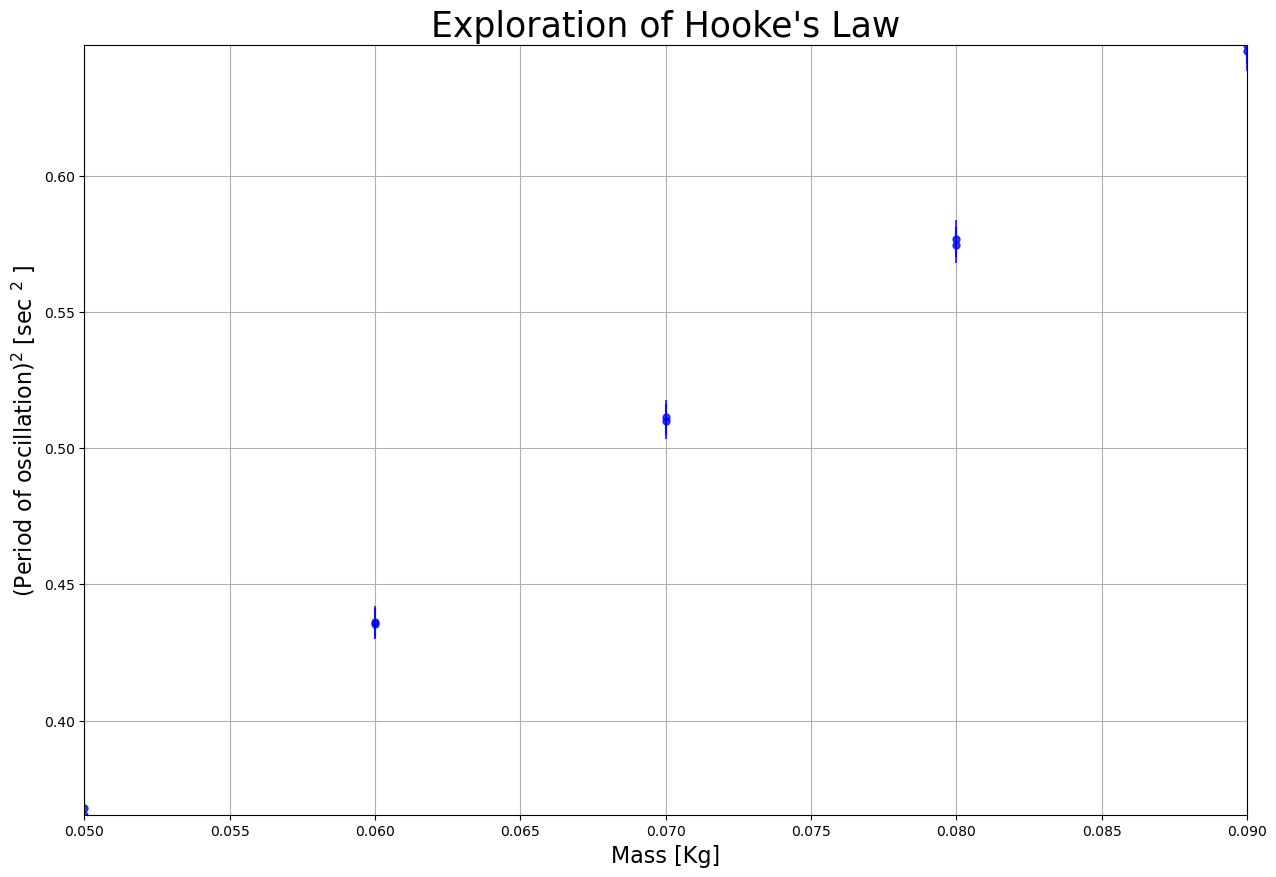

In [8]:
#Plotting the data

# Plot the data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

# Adding grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# Setting the axis limits for plots
plt.ylim(ymin, ymax)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis

plt.show()
# To save the plot as a .png, uncomment this:
#plot1 = "climatePlot1.png"
#plt.savefig("plot1", bbox_inches="tight", dpi=300)  # Saves the figure

## Analytical Fitting:

This section fits the data with a linear model.
It uses the least squared method to analytically find the line of best fit which minimizes the $\chi^2$ between the data and the model.
The best values of the slope (m) and intercept (b) are obtained with their errors (dm and db).

The following block defines a function which performs the least squared fit. A function is an individual block of code which takes some inputs (in this case, the x values, y values, and y uncertainties), performs some operations, and then returns outputs (in this case, a list containing the best slope, slope error, best y-intercept, and y-intercept error).

In [9]:
#Defining the Function
def OLSfit(x, y, dy=None):
    """Find the best fitting parameters of a linear fit to the data through the
    method of ordinary least squares estimation. (i.e. find m and b for
    y = m*x + b)

    Args:
        x: Numpy array of independent variable data
        y: Numpy array of dependent variable data. Must have same size as x.
        dy: Numpy array of dependent variable standard deviations. Must be same
            size as y.

    Returns: A list with four floating point values. [m, dm, b, db]
    """
    if dy is None:
        # if no error bars, weight every point the same
        dy = np.ones(x.size)
    denom = np.sum(1 / dy**2) * np.sum((x / dy) ** 2) - (np.sum(x / dy**2)) ** 2
    m = (
        np.sum(1 / dy**2) * np.sum(x * y / dy**2)
        - np.sum(x / dy**2) * np.sum(y / dy**2)
    ) / denom
    b = (
        np.sum(x**2 / dy**2) * np.sum(y / dy**2)
        - np.sum(x / dy**2) * np.sum(x * y / dy**2)
    ) / denom
    dm = np.sqrt(np.sum(1 / dy**2) / denom)
    db = np.sqrt(np.sum(x * x / dy**2) / denom)
    return [m, dm, b, db]

The next block runs the function to perform the best fit. It then prints out the best slope, slope error, best y-intercept, and y-intercept error. It then saves the best slope and y-intercept for later use.

In [10]:
# Fit the data with a straight line using the defined function OLSfit
bestfit = OLSfit(x_var, y_var, y_uncertainty)
print("Bestfit:")
print("slope            m=", str.format("{0:.6f}", bestfit[0]))
print("slope error     dm=", str.format("{0:.6f}", bestfit[1]))
print("Intercept        b=", str.format("{0:.6f}", bestfit[2]))
print("Intercept error db=", str.format("{0:.6f}", bestfit[3]))
slope = bestfit[0]
intercept = bestfit[2]

# Calculate Relative Uncertainty of Slope
print("Relative uncertainty of slope =", str.format("{0:.6f}", bestfit[1]/bestfit[0]))

Bestfit:
slope            m= 7.009397
slope error     dm= 0.138736
Intercept        b= 0.016453
Intercept error db= 0.009519
Relative uncertainty of slope = 0.019793


## Plotting the fit results:

Now, let's define the function for the best fit line. This function takes an x value as input and returns the corresponding y value, given by $y = slope * x + intercept$. The best slope and intercept values were found in the previous section.

In [11]:
#Best fit line
def BestFitLine(x):
    return slope * x + intercept

To display the line of best fit, we start by defining a range of x values to plot for the line. We then create an array of 200 points within this x range. For each point, we use the best fit parameters from the previous section to calculate the y value of the line at that point.

In [12]:
# First calculate a reasonable range of x values for the best fit line
x_length = max(x_var) - min(x_var)
x_min_l = min(x_var) - 5 #- 0.05*x_length
x_max_l = max(x_var) + 5 #+ 0.05*x_length
# Create an array of 200 linearly-spaced points
xForLine = np.linspace(x_min_l,x_max_l,200)
# Calculate the y values of the best fit line
yForLine = BestFitLine(xForLine)

Now we are ready to plot the line of best fit for our data. We repeat the code used to plot the data, and then plot the line of best fit.

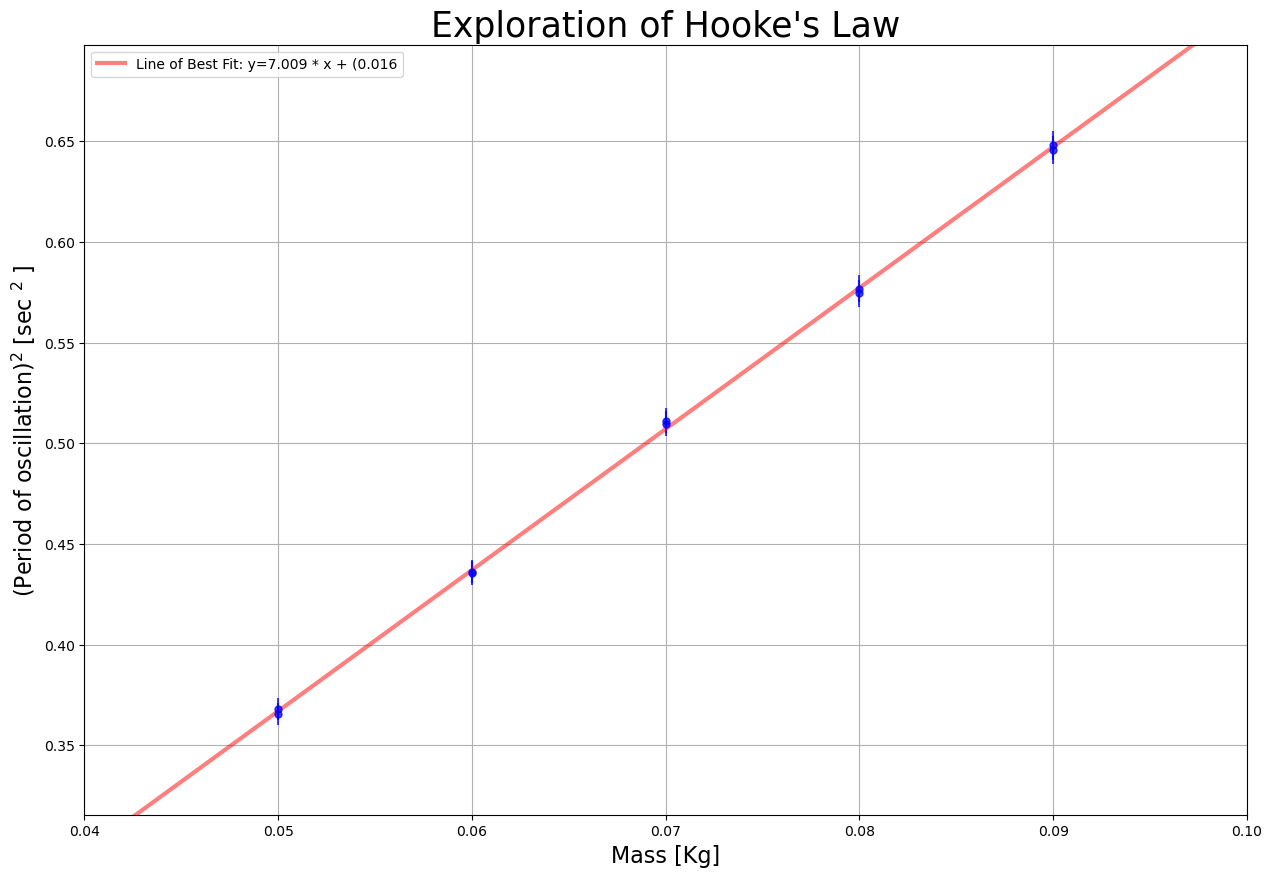

In [13]:
# Plot the data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# The axis limits
plt.ylim(ymin - 0.05, ymax + 0.05)  # This sets the range of the y-axis
plt.xlim(xmin - 0.01, xmax + 0.01)  # This sets the range of the x-axis

# Label the line with the fit parameters:
line_label = "Line of Best Fit: y="+str.format("{0:.3f}", slope)+" * x + ("+str.format("{0:.3f}", intercept)

# Add the line to the plot
plt.plot(xForLine, yForLine, lw=3, color="red", alpha=0.5, label=line_label)

# Add a legend
plt.legend()
plt.show()

# To save the plot as a .png, uncomment this:
#plt.savefig("plot_fit", bbox_inches="tight", dpi=300)  # Saves the figure

## Diagnosing the goodness-of-fit:

Now let's calculate the residual for each data point, i.e. the difference between the data and the best fit line.

In [14]:
#Calculate the residual vector
residual = y_var - BestFitLine(x_var)

Let's plot the residuals. For a good fit, the residuals should be evenly distributed around zero, and there should be no visible trend or pattern. Approximately 68% of the error bars (representing 1 standard deviation uncertainty)  should cross zero, and 95% of data points should be within two error bars of zero.

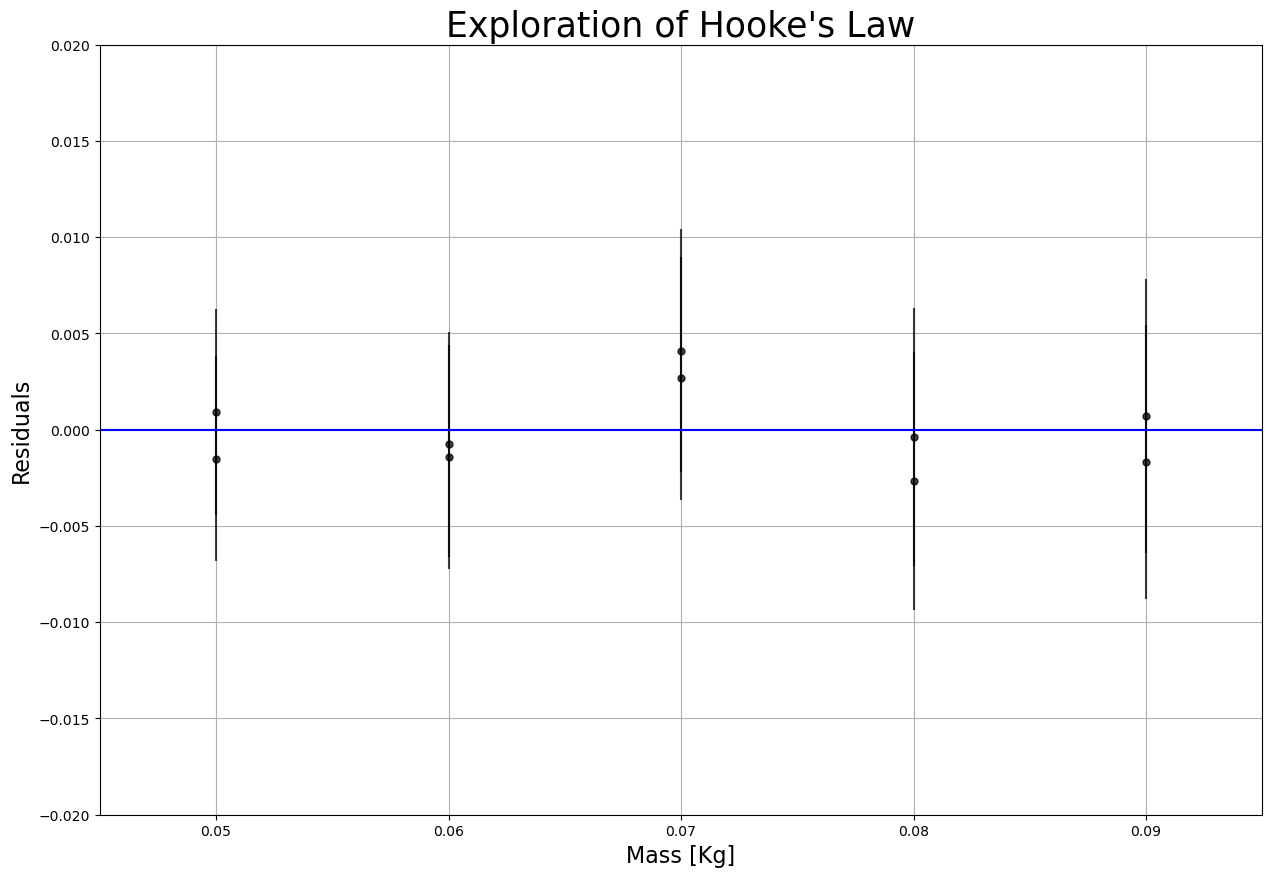

In [15]:
# Plot the residuals
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel("Residuals", fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# The axis limits 
ymin_r=-0.02
ymax_r=0.02
plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin - (xmin * 0.1), xmax + (xmin * 0.1))  # This sets the range of the x-axis

plt.axhline(y = 0, color = 'b', linestyle = '-') 

plt.show()

# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

Lets also calculate the $\chi^2$ value for our fit. This indicates the goodness-of-fit:
- $\chi^2>>1$ indicates the model is not a good fit to the data, or uncertainties are likely underestimated.
- $\chi^2\sim1$ indicates the model is a good fit to the data.
- $\chi^2<<1$ indicates the model is "too good" a fit, i.e. the uncertainties are likely overestimated.

In [16]:
#Calculate the Chi-sq
ndof = len(x_var) - 2 - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chi-sq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

Chi-sq 0.1449


### Calculation of Spring Constant
We can first isolate for just $k$ using the slope of our graph.
$$
\begin{align}
T^2 &= \frac{4 \pi^2 M}{k} \\
k &= \frac{4 \pi^2 M}{\text{Slope}}
\end{align}
$$



In [17]:
# Calculate K = g/s

k = (4 * np.pi**2) / bestfit[0]

uk = (4 * np.pi**2 * bestfit[1])/(bestfit[0]**2)

print("Spring Constant    k=", str.format("{0:.6f}", k))
print("K uncertainty   u[k]=", str.format("{0:.6f}", uk))
print("Relative uncertainty in K:", str.format("{0:.6f}", uk/k * 100))

print(k, uk)


Spring Constant    k= 5.632213
K uncertainty   u[k]= 0.111478
Relative uncertainty in K: 1.979288
5.632213495375376 0.11147774658938729


### Compare and Summarize
Once we have the data, completed the analysis and have a new result, we now need to think about what this means in the context of the goal. In doing so we should compare with our colleagues in order to get some context from the community. We will want to summarize the results in a sentence or two for later reference. Sometimes this step will lead to new questions and new investigations. Some questions to address while comparing and summarizing are: 

- Does our result make sense? 
- What does our result mean, physically?
- Is our result of high quality? 
- What’s our answer to the research question? 
- Did we attain the experimental goal? 
- What is the evidence to support our answer? (Pretend there is skeptic you have to convince)
- Are there any other interesting results that came out of our investigation? 

Remember to include units and uncertainties when reporting numerical values.

**<font color="005477">After our first round of data collection:</font>** \
Our findings included a Spring constant $k = 5.63 \pm 0.11$ [N/m], with a relative uncertainty of $\frac{u[k]}{k} = 3.9 \%$. Our $\chi^2$ was $0.14$, which indicates an overestimate in our uncertainties. We feel that we've found a "happy medium" of being realistic and having the best analytical results.

**Comparison with other groups**

|                      | Mia and Alexis                                               | Jaime and Amrita                      |
|----------------------|--------------------------------------------------------------|---------------------------------------|
| Spring Constant (k)  | $5.964 \pm 0.022$ [N/m]                                      | $5.874 \pm 0.072$ [N/m]               |
| Relative Uncertainty | $0.36 \%$                                                    | $1.23 \%$                             |
| Chi Squared          | 17.82                                                        | 1.51                                  |
| Procedure            | Stretched spring by 3.5 cm, and counted for 10 oscillations. | No information provided on procedure. |

When compared to other groups, we have similar results with similar uncertainties for Jaime and Amrita. All groups agreed that more masses and trials would result in better data.

### Investigate: Plan to Improve
If we have time, we will aim to do another round and improve our results. If not, then we should help those who come next by leaving some suggestions on how to make things better. We are the expert on our experiment, and we be most familiar on how to make it better. Try to keep things realistic, and attainable. Some things to think about when planning improvements: 
- How do we reduce our uncertainties? 
- How do we address any problems we’ve noted during our measurements stage? 
- Why will these improvements fix the problems or make things better? 

**Plan for improvement**
- Increase number of oscillation in each trial, as the impact of increasing $M$ will minimize $u[T]$ by increasing the devisor $M\sqrt{N}$.
- We plan to measure across a greater range of masses, this will result in a more robust data set to fit our model to.
- Reevaluate our uncertainty in measurement time, as the velocity of the spring is not constant, which changes human reaction speeds.

### Section 3: Summarize
Include a Compare/Summarize/Reflect discussion which includes the results, reporting the spring constants determined from your experimental approaches, assessment of the quality of the fits, and comparisons with other groups.

In summary, we accomplished part of our experimental goal to:
>Determine and compare the spring constant of a spring using two different experimental approaches based on Hooke’s Law (measuring stretch as a function of applied force and the oscillation period of a mass-on-a-spring system). You will design and carry out experiments to make high-quality experimental determinations of the spring constant using the stretch (Experiment 1) and oscillation (Experiment 2) approaches, as well as evaluating the underlying models.

We designed and carried our a high-quality experiment to determine the spring constant using the oscillation produced by applying a mass. We also evaluated the linear model used to fit our data, in which we found a clear correlation between the model and our collected data which was supported by our relative uncertainty of $\frac{u[k]}{k} = 3.9 \%$. We can support our conclusion by the physical characteristics of the spring, which is a thin, weak spring.

Peace out \**mic drop*\* 🎤